# Gaussian Mixure Models as Probability Density Estimator

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture

%matplotlib inline

## GMM as Density Estimation
Algorithm for *density estimation* (often categorized as clustering algorithm).  Generative probabilistic model describing the distribution of the data

## GMM for Generating New Data
Generate *new handwritten digits* from the standard digits corpus in sklearn

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Plot the first 100 digits to see what they look like

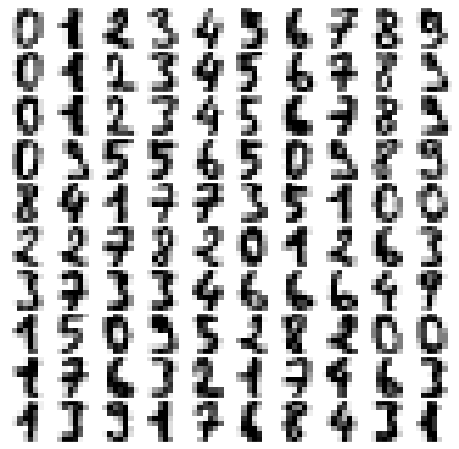

In [3]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
        
plot_digits(digits.data)

1797 digits in 64 dimensions.  Build a GMM on top of these to generate more. GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data. Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss. Given this projected data, let's use the AIC to get a gauge for the number of GMM components we should use:

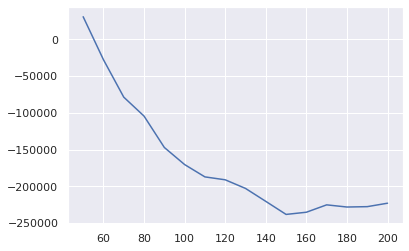

In [5]:
# Calculating BIC
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

It appears that around 110 components minimizes the AIC; we will use this model. Let's quickly fit this to the data and confirm that it has converged:

In [7]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model:

In [10]:
data_new,_ = gmm.sample(100)
data_new.shape

(100, 41)

Finally, we can use the inverse transform of the PCA object to construct the new digits:

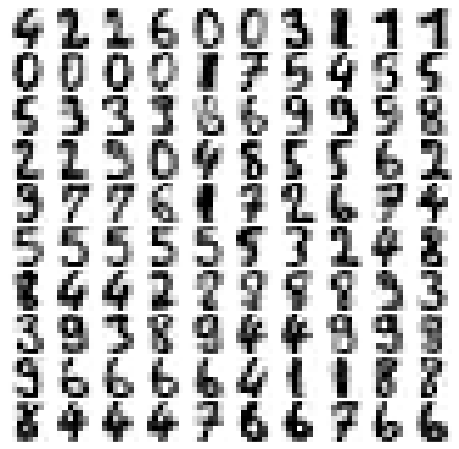

In [11]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

---